In [2]:
# PyCaret's Regression Module has over 25 algorithms and 10 plots 
# to analyze the performance of model

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
# frac 비율만큼 데이터 추출
data = dataset.sample(frac = 0.9, random_state = 786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)

print('Data For Modeling' + str(data.shape))
print('valid' + str(data_unseen.shape))

Data For Modeling(5400, 8)
valid(600, 8)


In [3]:
# 전체를 Import 합니다.
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id = 123, fold_shuffle= True)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [4]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,743.5434,2279259.4652,1471.0856,0.9782,0.0820,0.0610,0.0790
xgboost,Extreme Gradient Boosting,699.3738,2329256.3500,1487.5375,0.9776,0.0741,0.0542,0.1050
rf,Random Forest Regressor,758.1021,2656281.6215,1577.7316,0.9747,0.0828,0.0604,0.0680
lightgbm,Light Gradient Boosting Machine,769.7291,3307562.1553,1740.6027,0.9689,0.0790,0.0572,0.0210
gbr,Gradient Boosting Regressor,910.0160,3280066.4910,1776.2837,0.9684,0.1021,0.0771,0.0240
dt,Decision Tree Regressor,982.0174,4116623.1887,2000.9408,0.9597,0.1075,0.0778,0.0030
catboost,CatBoost Regressor,553.9605,1692294.3873,1187.3991,0.8841,0.0595,0.0436,0.1990
ridge,Ridge Regression,2413.0236,14101634.0000,3723.2112,0.8623,0.6580,0.2875,0.0030
lasso,Lasso Regression,2411.8772,14238726.1000,3732.7028,0.8616,0.6715,0.2866,0.1510
llar,Lasso Least Angle Regression,2354.9194,14257008.3000,3733.0156,0.8616,0.6448,0.2728,0.0030


In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [6]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4457.7476,26183490.6532,5116.9806,0.7097,0.5273,0.6242
1,4406.4936,24686094.5863,4968.5103,0.7253,0.5582,0.6759
2,3669.8077,19233114.3412,4385.5575,0.7997,0.4959,0.5612
3,4166.3664,23387636.7599,4836.0766,0.7335,0.5078,0.5981
4,4453.7670,25716853.1070,5071.1787,0.7545,0.5637,0.6818
5,4445.2485,28406145.7314,5329.7416,0.7358,0.5288,0.6267
6,4452.2309,26116308.2876,5110.4118,0.7333,0.5179,0.6119
7,4074.0412,22499269.4502,4743.3395,0.7437,0.4558,0.5188
8,4361.7020,29496047.9405,5431.0264,0.7861,0.4794,0.5503
9,4164.3741,24338926.3932,4933.4497,0.7786,0.5081,0.5856


In [7]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [8]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,804.3040,2893162.6048,1700.9299,0.9679,0.0827,0.0595
1,633.1056,1347614.8991,1160.8682,0.9850,0.0721,0.0540
2,643.3293,1689792.8876,1299.9203,0.9824,0.0682,0.0531
3,638.9543,1864115.6648,1365.3262,0.9788,0.0702,0.0519
4,851.2905,3527790.2266,1878.2413,0.9663,0.0862,0.0622
5,805.3468,6579083.7007,2564.9725,0.9388,0.0853,0.0556
6,756.7905,2029777.5619,1424.7026,0.9793,0.0803,0.0611
7,688.1464,1693697.9731,1301.4215,0.9807,0.0710,0.0529
8,1021.6679,7724007.4683,2779.2099,0.9440,0.0918,0.0618
9,854.3557,3726578.5665,1930.4348,0.9661,0.0824,0.0602


In [9]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1023.2633,3695959.7015,1922.4879,0.9590,0.1058,0.0785
1,883.5807,2784090.8390,1668.5595,0.9690,0.0999,0.0749
2,960.0935,4446799.7506,2108.7436,0.9537,0.1071,0.0739
3,778.7805,1952984.7152,1397.4923,0.9777,0.1045,0.0766
4,1016.1828,3430015.4557,1852.0301,0.9673,0.1169,0.0860
5,976.9581,4348524.4073,2085.3116,0.9596,0.1048,0.0718
6,958.7801,3511993.5378,1874.0314,0.9641,0.1051,0.0774
7,975.3208,4172044.7606,2042.5584,0.9525,0.0982,0.0745
8,1064.8622,5780533.1590,2404.2739,0.9581,0.1103,0.0774
9,1182.3526,7043285.5608,2653.9189,0.9359,0.1224,0.0868


In [10]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2681.2838,15509010.1582,3938.1481,0.8281,0.2907,0.2708
1,2540.4965,12854417.6893,3585.3058,0.8570,0.3036,0.2904
2,2642.6644,14539911.7692,3813.1236,0.8486,0.3160,0.3044
3,2498.2038,15049356.0084,3879.3499,0.8285,0.2596,0.2288
4,2676.1335,16319916.9329,4039.7917,0.8442,0.3103,0.2892
5,2811.3681,19738764.2131,4442.8329,0.8164,0.3034,0.2890
6,2726.6593,15416004.3347,3926.3220,0.8426,0.2990,0.2799
7,2814.8539,16886395.1853,4109.3059,0.8077,0.2934,0.2653
8,2887.3326,24245016.3825,4923.9229,0.8242,0.2617,0.2283
9,2891.6781,21200854.4339,4604.4386,0.8072,0.3063,0.2697


In [14]:
import numpy as np

lgbm_params = {'num_leaves' : np.arange(10, 200, 10),
              'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
              'learning_rate': np.arange(0.1, 1, 0.1)
              }

In [15]:
tuned_light_gbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,905.9180,3748732.7496,1936.1644,0.9584,0.0893,0.0640
1,733.4500,1537254.8527,1239.8608,0.9829,0.0906,0.0688
2,687.5311,2176537.5703,1475.3093,0.9773,0.0808,0.0601
3,732.0622,2138919.2261,1462.5044,0.9756,0.0901,0.0641
4,839.0876,2392997.1620,1546.9315,0.9772,0.0954,0.0669
5,857.5428,5576657.9172,2361.4948,0.9481,0.0934,0.0630
6,864.7449,3020916.5700,1738.0784,0.9691,0.0949,0.0682
7,802.8694,2034924.4270,1426.5078,0.9768,0.0849,0.0631
8,986.2664,4801268.0666,2191.1796,0.9652,0.0919,0.0659
9,918.0380,3154128.6755,1775.9867,0.9713,0.0971,0.0712


In [17]:
print(tuned_light_gbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7000000000000001,
              max_depth=90, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [18]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1191.5664,5785985.0449,2405.4075,0.9359,0.1258,0.0921
1,955.2708,3463849.2025,1861.1419,0.9615,0.1049,0.0815
2,1042.4110,5449487.5770,2334.4138,0.9433,0.1090,0.0829
3,923.5187,2514184.7921,1585.6181,0.9714,0.1103,0.0846
4,1104.1533,3928145.3888,1981.9549,0.9625,0.1150,0.0866
5,1020.5698,5259228.6745,2293.3008,0.9511,0.1120,0.0796
6,1018.6106,4165168.5637,2040.8745,0.9575,0.1101,0.0796
7,997.5311,3365775.5868,1834.6050,0.9617,0.1026,0.0793
8,1166.5002,7016954.3043,2648.9534,0.9491,0.1170,0.0842
9,1181.8975,6240266.2759,2498.0525,0.9432,0.1113,0.0828


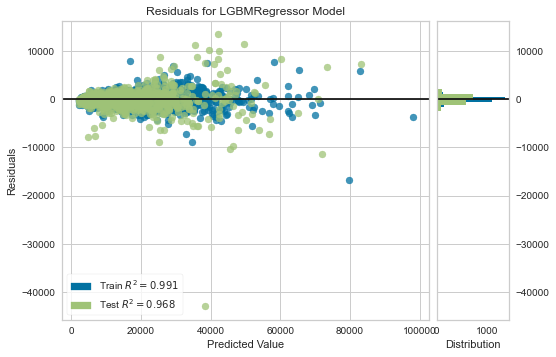

In [20]:
plot_model(tuned_light_gbm)

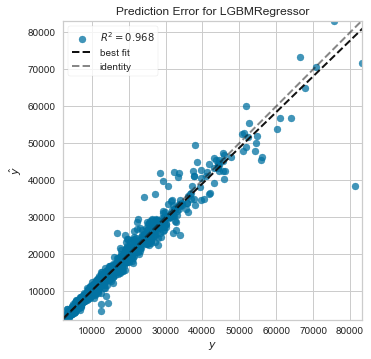

In [22]:
plot_model(tuned_light_gbm, plot = 'error')

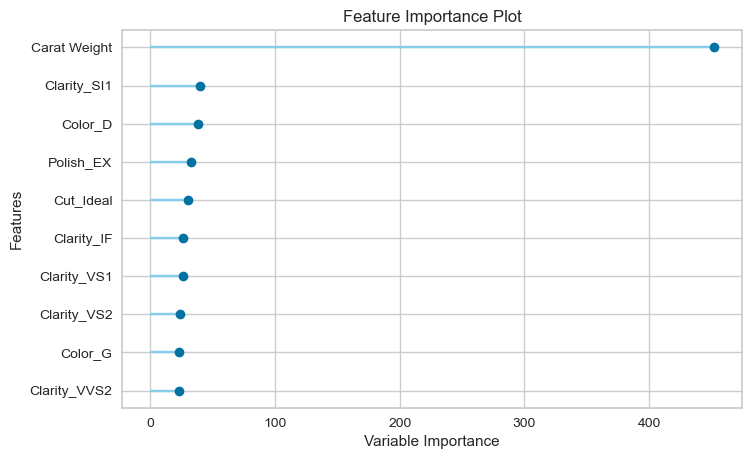

In [24]:
plot_model(tuned_light_gbm, plot='feature')

In [26]:
evaluate_model(tuned_light_gbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(tuned_light_gbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,815.5947,3533081.3343,1879.6493,0.9678,0.0926,0.0627


In [29]:
final_lightgbm = finalize_model(tuned_light_gbm)

In [30]:
final_lightgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7000000000000001,
              max_depth=90, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [31]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,563.6509,1128172.6363,1062.1547,0.9897,0.0672,0.0494


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7059.0,6682.868511
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5809.0,6144.820011
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10641.0,9833.031205
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2871.0,2760.279275
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,21706.0,23159.568032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12906.0,13189.108962
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3235.0,3437.805356
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9058.0,8994.960475
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5091.0,4709.944255


In [32]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13726.014355
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9832.732501
2,1.01,Good,E,SI1,G,G,GIA,5161,5084.223864
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34806.015232
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4070.414292


In [33]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [35]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Price'], unseen_predictions['Label'], 'R2')

0.9776